## TASK 3 ##

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.circuit.library import CSwapGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import transpile
from qiskit.circuit.library import CSwapGate
import numpy as np

Figure(705.552x451.5)


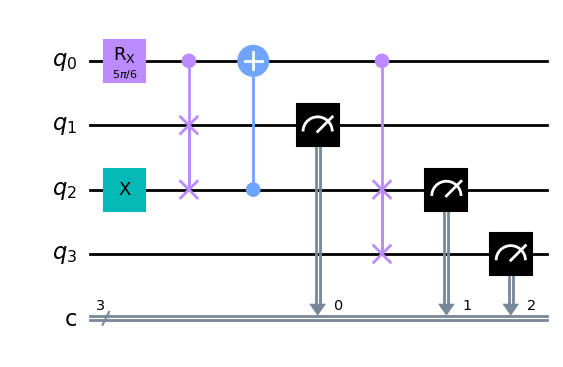

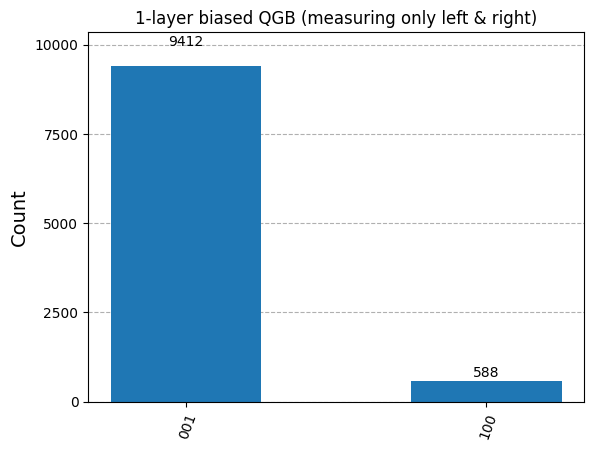

In [2]:

def one_layer_biased_qgb(theta):
    """
    Implements a one-layer biased quantum Galton board as in the provided circuit diagram.
    - theta: bias angle for Rx gate on the coin qubit.
    """
    qc = QuantumCircuit(4, 3)  # q0=coin, q1-q3=positions, 3 classical bits

    # Initialize ball at center position (q2)
    qc.x(2)
    # Initialize coin in |0> (already default)
    # Apply Rx(theta) to coin
    qc.rx(theta, 0)

    # Controlled-SWAP (coin, q1, q2)
    qc.append(CSwapGate(), [0, 1, 2])
    # CNOT (q2, coin)
    qc.cx(2, 0)
    # Controlled-SWAP (coin, q2, q3)
    qc.append(CSwapGate(), [0, 2, 3])

    # Measure position qubits
    qc.measure(1, 0)
    qc.measure(2, 1)
    qc.measure(3, 2)

    # Draw circuit in Clifford style
    print(qc.draw(output='mpl', style='clifford', fold=1))
    return qc

# Example usage:
qc = one_layer_biased_qgb(theta=5 * np.pi / 6)
    
# Simulate
sim = AerSimulator()
from qiskit import transpile
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=10000).result()
counts = result.get_counts()

# Show result
plot_histogram(counts)
plt.title("1-layer biased QGB (measuring only left & right)")
plt.show()

2 layer biased QGB

Figure(1625.27x618.722)


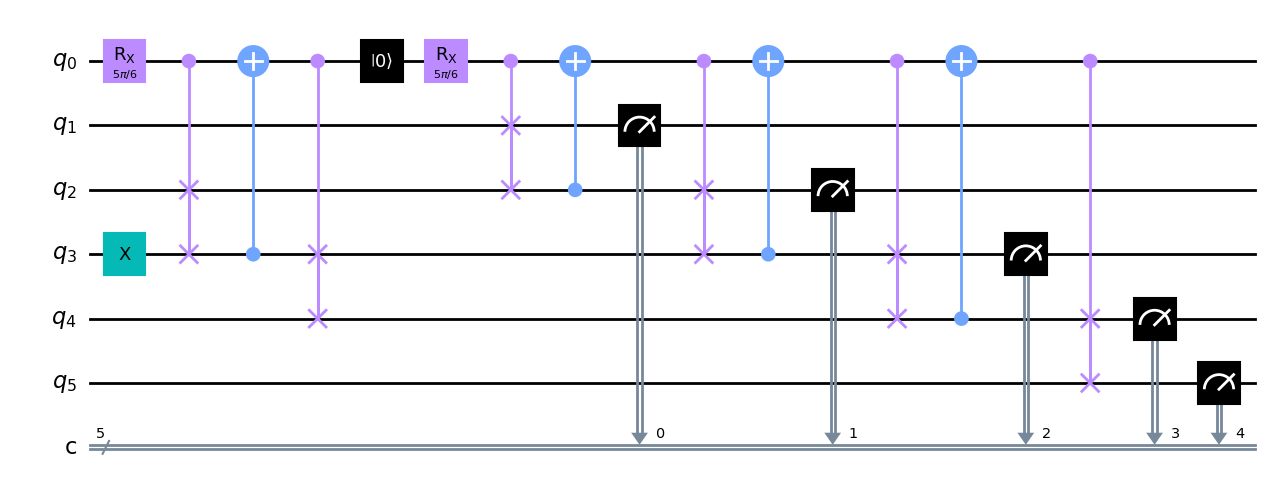

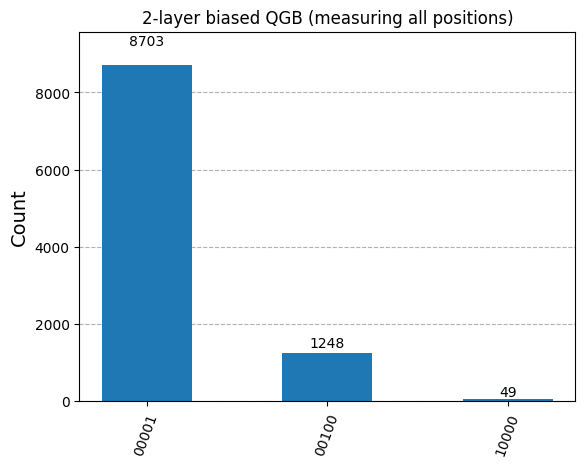

In [3]:
def two_layer_biased_qgb(theta):
    """
    Implements a two-layer biased quantum Galton board.
    - theta: bias angle for Rx gate on the coin qubit.
    """
    qc = QuantumCircuit(6, 5)  # q0=coin, q1-q5=positions, 5 classical bits

    # Initialize ball at center position (q3)
    qc.x(3)
    # Layer 1
    qc.rx(theta, 0)
    qc.append(CSwapGate(), [0, 2, 3])
    qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4])

    # Reset coin to |0> before layer 2
    qc.reset(0)

    # Layer 2
    qc.rx(theta, 0)
    qc.append(CSwapGate(), [0, 1, 2])
    qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3])
    qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4])
    qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5])

    # Measure position qubits
    qc.measure(1, 0)
    qc.measure(2, 1)
    qc.measure(3, 2)
    qc.measure(4, 3)
    qc.measure(5, 4)

    # Draw circuit in Clifford style
    print(qc.draw(output='mpl', style='clifford', fold=1))
    return qc

# Example usage:
qc = two_layer_biased_qgb(theta=5 * np.pi / 6)

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=10000).result()
counts = result.get_counts()

# Show result
plot_histogram(counts)
plt.title("2-layer biased QGB (measuring all positions)")
plt.show()

n layer biased QGB 

Figure(6409.14x1120.39)


NameError: name 'n_layers' is not defined

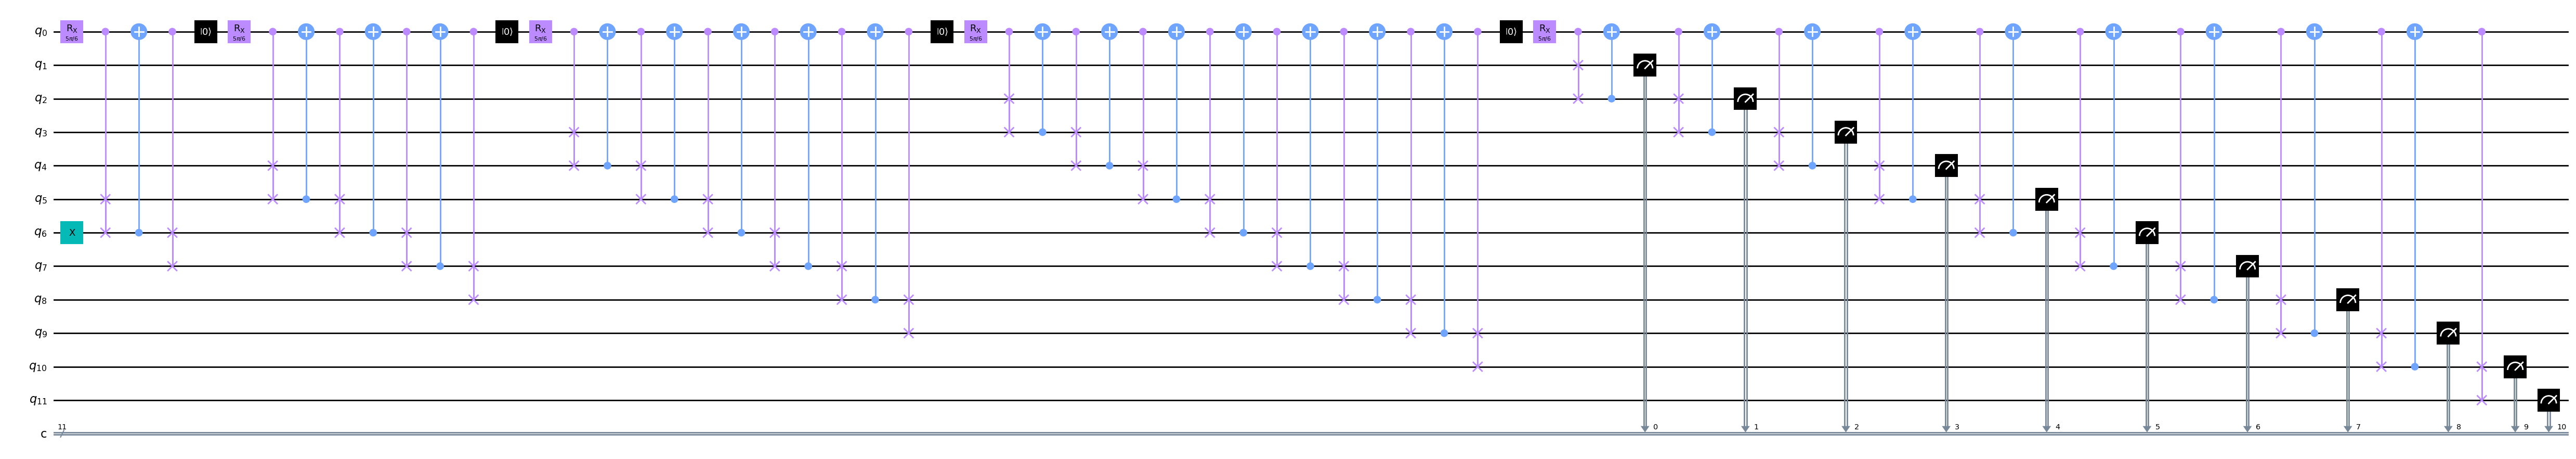

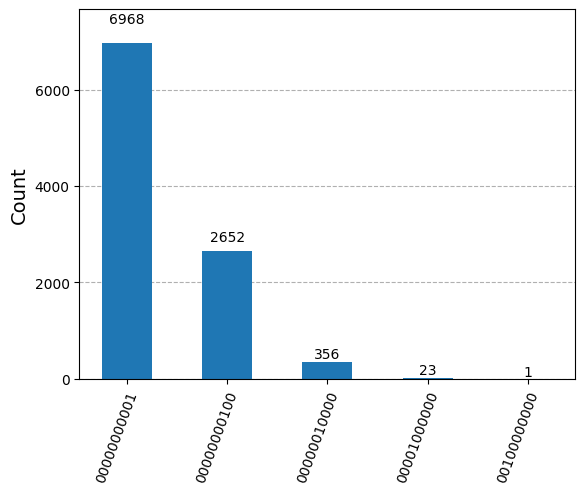

In [4]:
def n_layer_biased_qgb(n_layers, theta):
    """
    Implements an n-layer biased quantum Galton board.
    - n_layers: number of layers
    - theta: bias angle for Rx gate on the coin qubit.
    """
    num_positions = 2 * n_layers + 1
    total_qubits = num_positions + 1  # 1 coin + position qubits
    qc = QuantumCircuit(total_qubits, num_positions)

    coin = 0
    center = n_layers + 1  # q[index of center position]

    # Initialize ball at center
    qc.x(center)

    for k in range(1, n_layers + 1):
        qc.rx(theta, coin)
        # Pairs for this layer: (center-k) to (center+k-1)
        pairs = [(j, j + 1) for j in range(center - k, center + k)]
        for i, (a, b) in enumerate(pairs):
            qc.append(CSwapGate(), [coin, a, b])
            if i < len(pairs) - 1:
                qc.cx(b, coin)
        # Reset coin to |0> before next layer (unless last layer)
        if k < n_layers:
            qc.reset(coin)

    # Measure all position qubits
    for i, pos in enumerate(range(1, num_positions + 1)):
        qc.measure(pos, i)

    # Draw circuit in Clifford style
    print(qc.draw(output='mpl', style='clifford', fold=1))
    return qc

# Example usage:
qc = n_layer_biased_qgb(n_layers=5, theta=5 * np.pi / 6)

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=10000).result()
counts = result.get_counts()

# Show result
plot_histogram(counts)
# plt.title("n-layer biased QGB (measuring all positions)")
plt.title(f"{n_layers}-layer QGB measurement distribution")

plt.show()